In [1]:
import rasterio
import geopandas as gpd
import pyproj
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import lightgbm as lgbm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from numpy import *
import numpy as np

In [2]:
path = 'C:/Users/Rasmu/Documents/Thesis/Hardangervidda/Training_Data/'
#path = 'C://Users/rasmu/Documents/Thesis/Hardangervidda/Dates/20200306/sampled/SD.shp'

In [3]:
df = gpd.read_file(path)

In [4]:
df.head(50)

,SD,VH,Diff,Ratio,Subtract,DEM,geometry
0,0.500,-19.437502,2.819309,1.854717,-8.957466,1086.152222,POINT (128384.819 6671602.703)
1,0.500,-19.374317,NaN,1.889863,-9.122613,1087.895996,POINT (128381.925 6673003.668)
2,0.630,-19.374317,NaN,1.889863,-9.122613,1086.379761,POINT (128381.610 6673093.802)
3,0.630,-19.000932,NaN,1.988458,-9.445318,1085.900879,POINT (128376.912 6675086.486)
4,0.800,-18.960358,3.854372,1.993921,-9.451275,1086.180420,POINT (128376.097 6675477.150)
5,0.810,-19.173423,3.612125,1.966747,-9.424622,1111.801392,POINT (128373.691 6676497.938)
6,0.780,-19.121391,3.777136,1.933598,-9.232368,1107.120605,POINT (128372.785 6676858.871)
7,0.700,-19.330999,3.723898,1.843153,-8.842991,1098.295166,POINT (128369.264 6678480.809)
8,0.750,-19.474664,3.663133,1.864057,-9.027200,1182.602051,POINT (128367.078 6679492.495)
9,0.720,-19.556499,3.504252,1.866030,-9.076230,1258.865723,POINT (128364.511 6680533.761)


(1000.0, 1500.0)

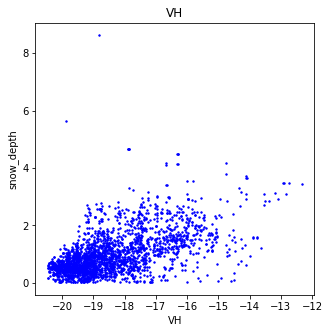

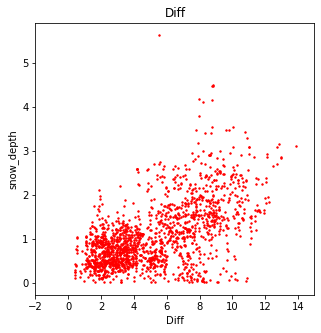

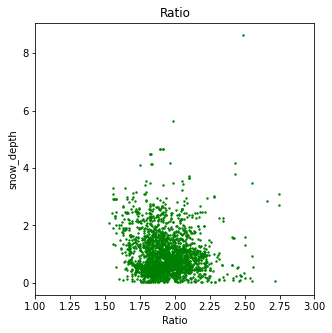

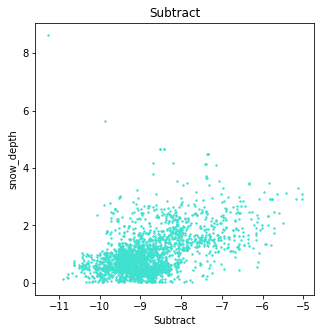

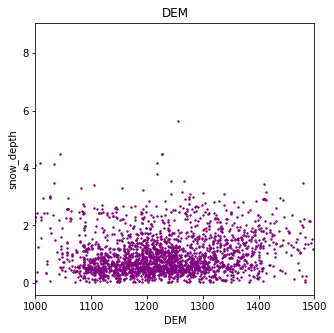

In [20]:
plt.figure(figsize=(5, 5))
plt.title('VH')
plt.xlabel('VH')
plt.ylabel('snow_depth')
#plt.xlim([-1, 5])
plt.scatter(df.VH, df.SD, color='blue',s=2);

plt.figure(figsize=(5, 5))
plt.title('Diff')
plt.xlabel('Diff')
plt.ylabel('snow_depth')
plt.scatter(df.Diff, df.SD, color='red',s=2);
plt.xlim([-2, 15])

plt.figure(figsize=(5, 5))
plt.title('Ratio')
plt.xlabel('Ratio')
plt.ylabel('snow_depth')
plt.scatter(df.Ratio, df.SD, color='green',s=2);
plt.xlim([1, 3])

plt.figure(figsize=(5, 5))
plt.title('Subtract')
plt.xlabel('Subtract')
plt.ylabel('snow_depth')
plt.scatter(df.Subtract, df.SD, color='turquoise',s=2);

plt.figure(figsize=(5, 5))
plt.title('DEM')
plt.xlabel('DEM')
plt.ylabel('snow_depth')
plt.scatter(df.DEM, df.SD, color='purple',s=2);
plt.xlim([1000, 1500])

In [16]:
#df = df.replace(np.nan, 0)
#r2 = str(r2_score(df.Subtract, df.SD).round(2))
#print('R2 score is: ', r2)

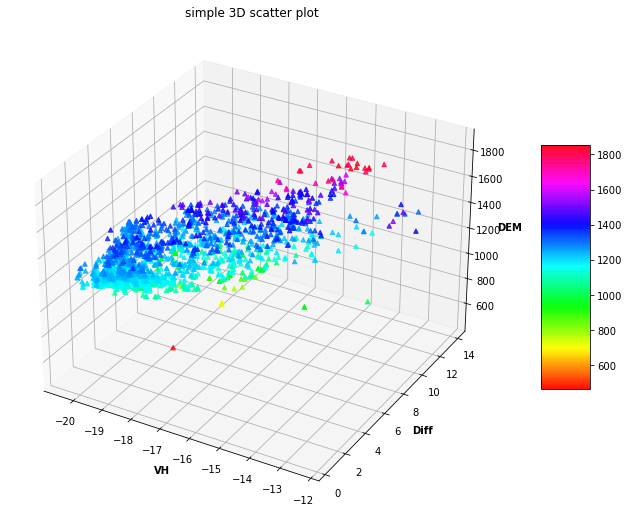

In [13]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(df.VH, df.Diff, df.DEM,
                    alpha = 0.8,
                    c = (df.VH + df.Diff + df.DEM),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('VH', fontweight ='bold')
ax.set_ylabel('Diff', fontweight ='bold')
ax.set_zlabel('DEM', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

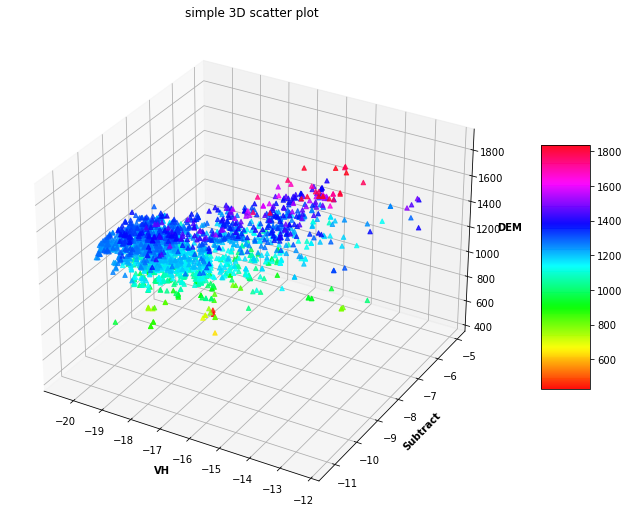

In [8]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(df.VH, df.Subtract, df.DEM,
                    alpha = 0.8,
                    c = (df.VH + df.Subtract + df.DEM),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('VH', fontweight ='bold')
ax.set_ylabel('Subtract', fontweight ='bold')
ax.set_zlabel('DEM', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

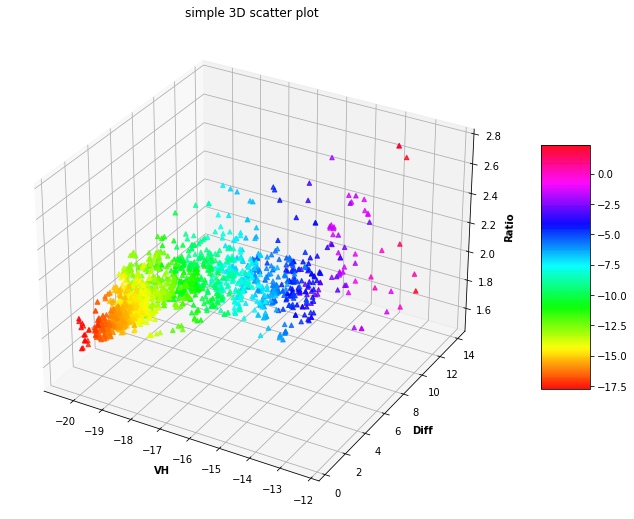

In [9]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(df.VH, df.Diff, df.Ratio,
                    alpha = 0.8,
                    c = (df.VH + df.Diff + df.Ratio),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('VH', fontweight ='bold')
ax.set_ylabel('Diff', fontweight ='bold')
ax.set_zlabel('Ratio', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

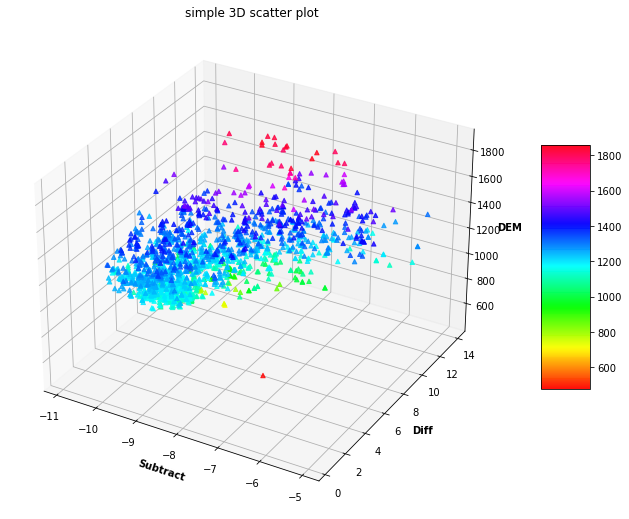

In [10]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(df.Subtract, df.Diff, df.DEM,
                    alpha = 0.8,
                    c = (df.Subtract + df.Diff + df.DEM),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('Subtract', fontweight ='bold')
ax.set_ylabel('Diff', fontweight ='bold')
ax.set_zlabel('DEM', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()